In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import defaultdict
plt.style.use("ggplot")

%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn import tree

import warnings

warnings.filterwarnings('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/ML/smoking.csv").drop(["ID", "oral"], axis = 1)
df = df.iloc[:10000]
df.rename(columns = {"height(cm)" : "height_cm", "weight(kg)" : "weight_kg",
                     "waist(cm)" : "waist_cm", "eyesight(left)" : "eyesight_left",
                     "eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
                     "hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
                     "Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
                     "Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
                     "AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
          inplace = True)
df['tartar'] = df['tartar'].apply(lambda x: 1 if x == "Y" else 0)
                                  

Mounted at /content/drive


# Смотрим на исходные данные

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height_cm            55692 non-null  int64  
 3   weight_kg            55692 non-null  int64  
 4   waist_cm             55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ldl                  55692 non-null 

In [ ]:
df.head().style.background_gradient(cmap = "Oranges")

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,F,40,155,60,81.300000,1.200000,1.000000,1.000000,1.000000,114.000000,73.000000,94.000000,215.000000,82.000000,73.000000,126.000000,12.900000,1.000000,0.700000,18.000000,19.000000,27.000000,0,1,0
1,F,40,160,60,81.000000,0.800000,0.600000,1.000000,1.000000,119.000000,70.000000,130.000000,192.000000,115.000000,42.000000,127.000000,12.700000,1.000000,0.600000,22.000000,19.000000,18.000000,0,1,0
2,M,55,170,60,80.000000,0.800000,0.800000,1.000000,1.000000,138.000000,86.000000,89.000000,242.000000,182.000000,55.000000,151.000000,15.800000,1.000000,1.000000,21.000000,16.000000,22.000000,0,0,1
3,M,40,165,70,88.000000,1.500000,1.500000,1.000000,1.000000,100.000000,60.000000,96.000000,322.000000,254.000000,45.000000,226.000000,14.700000,1.000000,1.000000,19.000000,26.000000,18.000000,0,1,0
4,F,40,155,60,86.000000,1.000000,1.000000,1.000000,1.000000,120.000000,74.000000,80.000000,184.000000,74.000000,62.000000,107.000000,12.500000,1.000000,0.600000,16.000000,14.000000,22.000000,0,0,0


In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.18,12.07,20.0,40.0,40.0,55.0,85.0
height_cm,55692.0,164.65,9.19,130.0,160.0,165.0,170.0,190.0
weight_kg,55692.0,65.86,12.82,30.0,55.0,65.0,75.0,135.0
waist_cm,55692.0,82.05,9.27,51.0,76.0,82.0,88.0,129.0
eyesight_left,55692.0,1.01,0.49,0.1,0.8,1.0,1.2,9.9
eyesight_right,55692.0,1.01,0.49,0.1,0.8,1.0,1.2,9.9
hearing_left,55692.0,1.03,0.16,1.0,1.0,1.0,1.0,2.0
hearing_right,55692.0,1.03,0.16,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.49,13.68,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.00,9.68,40.0,70.0,76.0,82.0,146.0


In [ ]:
df.corr().style.background_gradient(cmap = "seismic")

,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
age,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.203993,0.208722,0.134023,0.050745,0.182351,0.055557,0.015102,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.114984,-0.081796,-0.162557
height_cm,-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,-0.078663,-0.078323,0.080585,0.113193,0.019619,-0.082161,0.156693,-0.213284,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.079331,0.055513,0.396675
weight_kg,-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,-0.050094,-0.052836,0.266131,0.271634,0.136237,0.026403,0.324429,-0.358868,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.073536,0.059921,0.302780
waist_cm,-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.023790,0.019286,0.316922,0.292627,0.211132,0.065467,0.361922,-0.376203,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.044203,0.046197,0.226259
eyesight_left,-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.046571,-0.048788,-0.019330,0.005199,-0.041851,-0.004985,0.019717,-0.015296,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.003684,0.012532,0.061204
eyesight_right,-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.043877,-0.046623,-0.013720,0.011357,-0.044006,-0.007851,0.019881,-0.022220,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.016359,0.006568,0.063017
hearing_left,0.203993,-0.078663,-0.050094,0.023790,-0.046571,-0.043877,1.000000,0.510095,0.055219,0.008754,0.042314,-0.023276,0.004750,-0.020159,-0.016706,-0.026116,0.014527,0.003349,0.018074,0.004820,0.012864,-0.016100,-0.035396,-0.023209
hearing_right,0.208722,-0.078323,-0.052836,0.019286,-0.048788,-0.046623,0.510095,1.000000,0.049095,0.001651,0.041339,-0.023058,0.000267,-0.017986,-0.015426,-0.030943,0.019461,0.008060,0.009393,-0.005081,0.009245,-0.016376,-0.026698,-0.018855
systolic,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,0.055219,0.049095,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.029894,0.006542,0.073109
relaxation,0.050745,0.113193,0.271634,0.292627,0.005199,0.011357,0.008754,0.001651,0.761051,1.000000,0.147879,0.095357,0.215541,-0.089410,0.041017,0.232899,0.045665,0.085033,0.085151,0.106648,0.177648,0.031634,0.021659,0.108309


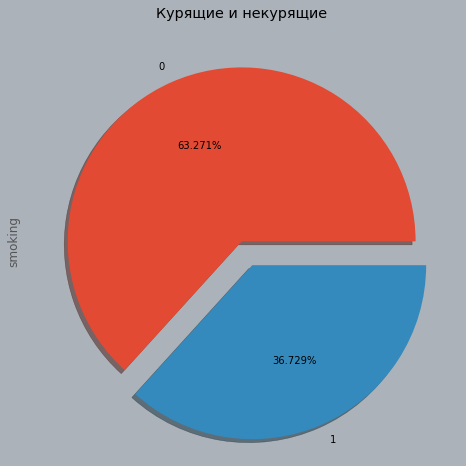

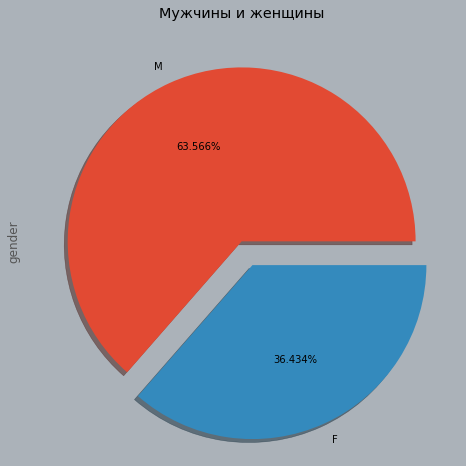

In [ ]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Курящие и некурящие");

plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Мужчины и женщины");

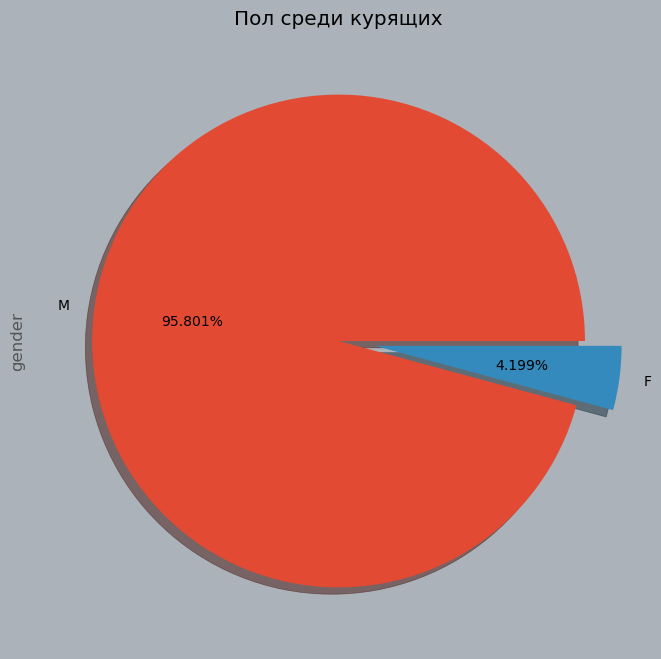

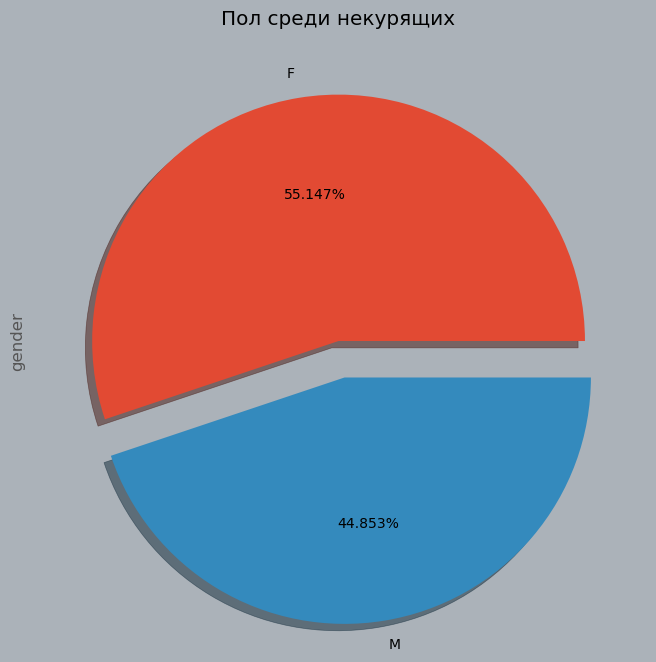

In [ ]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.smoking == 1]["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Пол среди курящих");

plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.smoking == 0]["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
            set(title = "Пол среди некурящих");

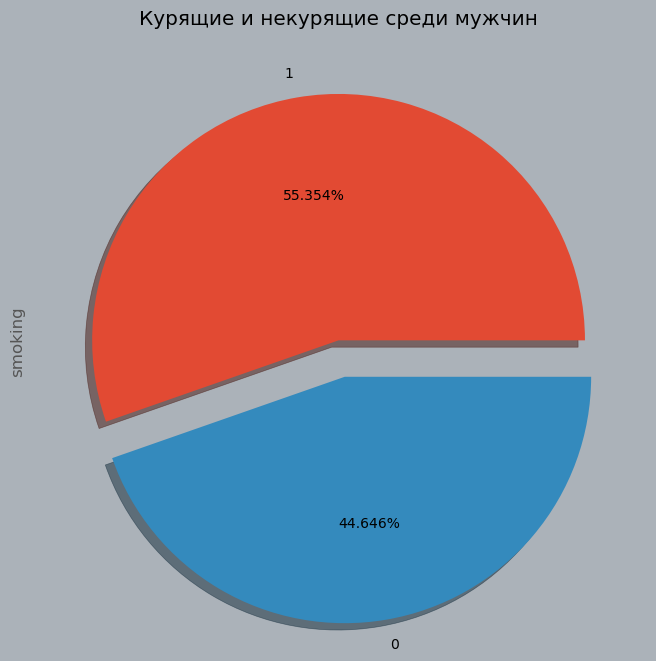

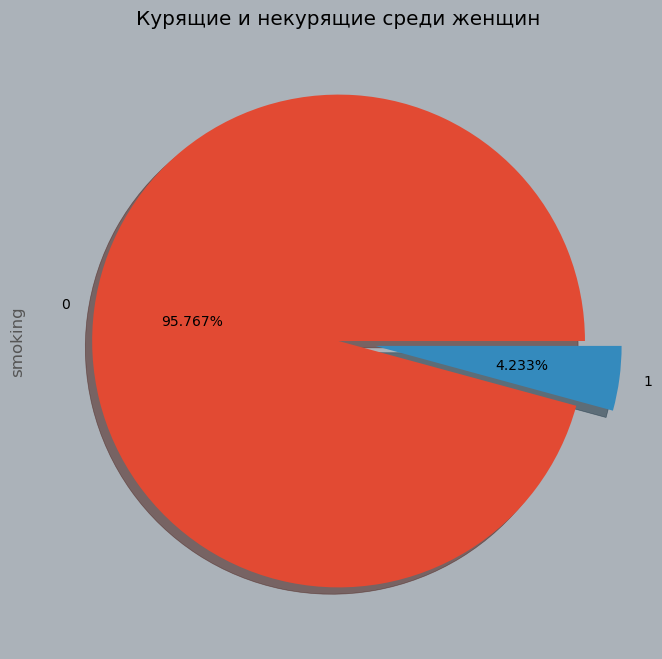

In [ ]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.gender == "M"]["smoking"].value_counts(). \
                plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
                set(title = "Курящие и некурящие среди мужчин");

plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df[df.gender == "F"]["smoking"].value_counts(). \
                plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True). \
                set(title = "Курящие и некурящие среди женщин");

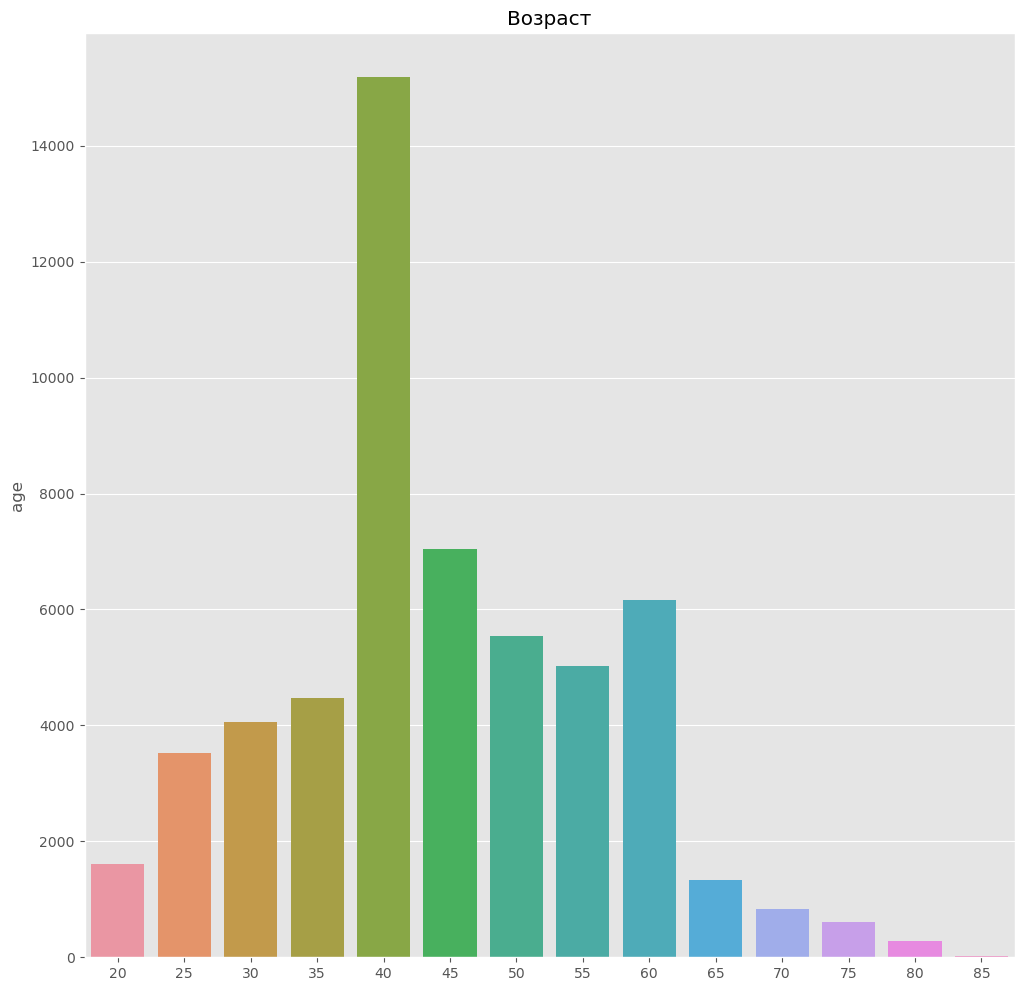

In [ ]:
fig, axes = plt.subplots(figsize = (12, 12))

sns.barplot(ax = axes,
            x = df["age"].value_counts().index,
            y = df["age"].value_counts(),
            data = df).set(title =  "Возраст");

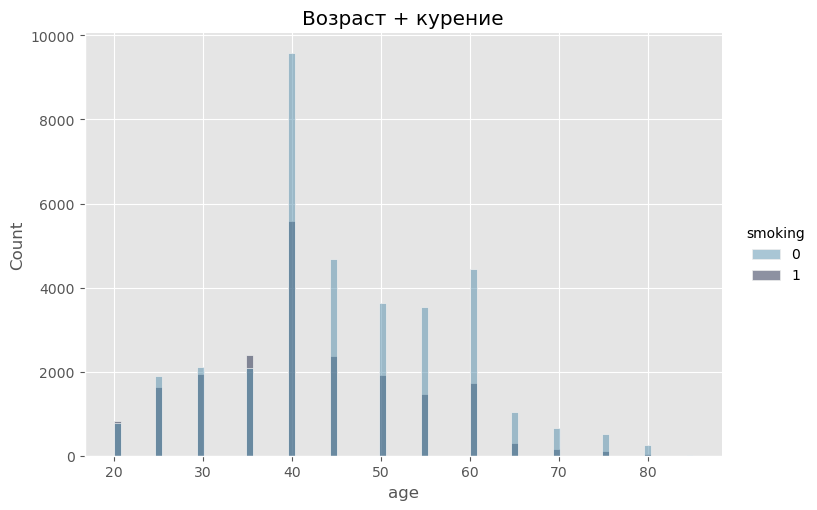

In [ ]:
sns.displot(data = df, x = "age", hue = "smoking", kind = "hist", height = 5, aspect = 1.5,
    palette="ch:rot=-.25,hue=1,light=.50").set(title =  "Возраст + курение");

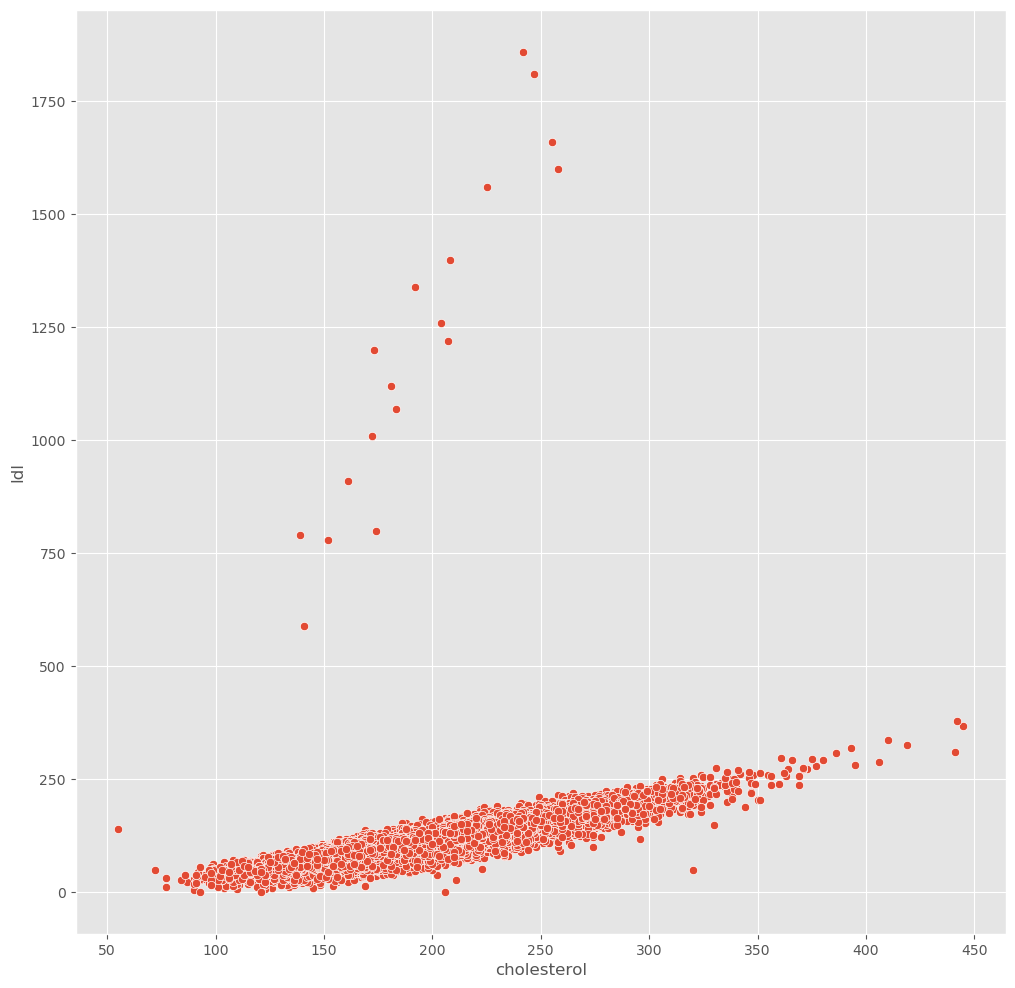

In [ ]:
fig, axes = plt.subplots(figsize = (12, 12))
sns.scatterplot(ax = axes,
            x = df["cholesterol"],
            y = df["ldl"],
            data = df);

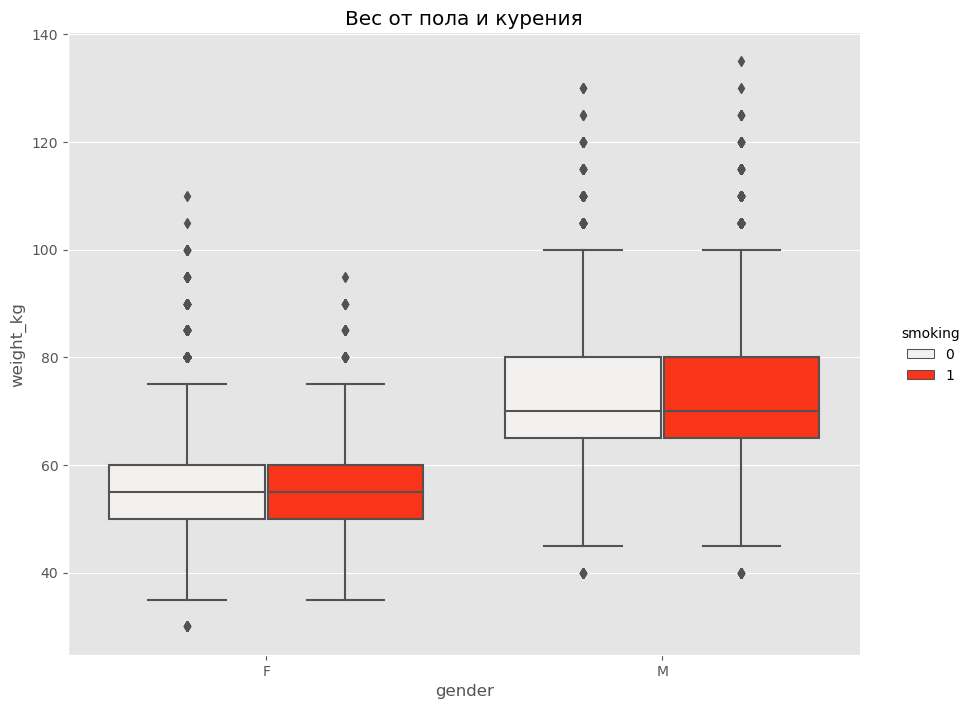

In [ ]:
sns.catplot(x = "gender",
            y = "weight_kg",
            kind = "box",
            hue = "smoking",
            color = '#F83419',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "Вес от пола и курения");

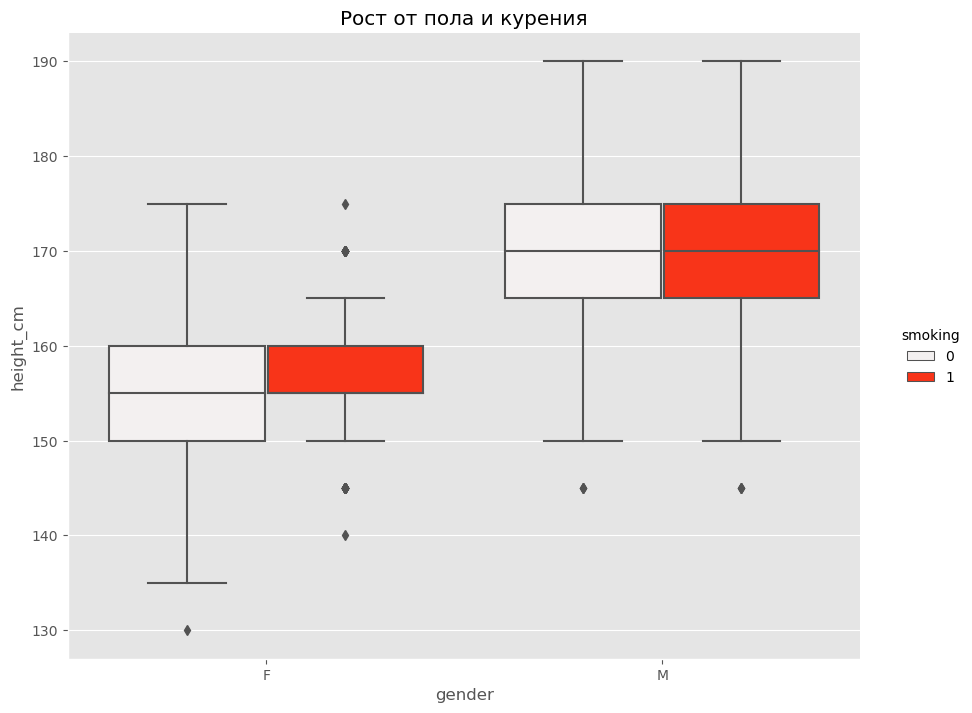

In [ ]:
sns.catplot(x = "gender",
            y = "height_cm",
            kind = "box",
            hue = "smoking",
            color = '#F83419',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "Рост от пола и курения");

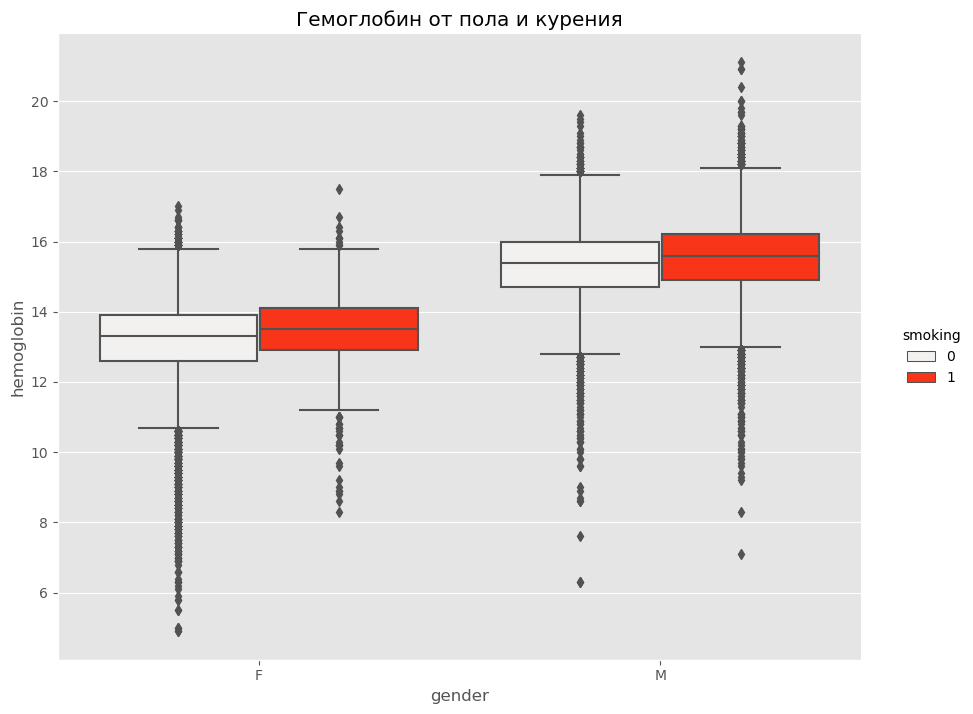

In [ ]:
sns.catplot(x = "gender",
            y = "hemoglobin",
            kind = "box",
            hue = "smoking",
            color = '#F83419',
            data = df, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True).set(title = "Гемоглобин от пола и курения");

# Подготовка данных

In [7]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == "M" else 0)

In [8]:
clean_df = (df-df.mean ())/df.std()

In [9]:
clean_df.head()

,gender,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,...,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,smoking
0,-1.308176,-0.349794,-1.038319,-0.453376,-0.079091,0.425579,-0.016225,-0.155461,-0.167521,-0.553746,...,0.292360,-1.092703,-0.214028,-0.840664,-0.393420,-0.238093,-0.252186,-0.525174,0.898293,-0.752569
1,-1.308176,-0.349794,-0.496682,-0.453376,-0.111628,-0.469012,-0.818428,-0.155461,-0.167521,-0.187158,...,0.319346,-1.220222,-0.214028,-1.294930,-0.200470,-0.238093,-0.427073,-0.525174,0.898293,-0.752569
2,0.764346,0.892960,0.586593,-0.453376,-0.220086,-0.469012,-0.417326,-0.155461,-0.167521,1.205878,...,0.967001,0.756331,-0.214028,0.522133,-0.248708,-0.326700,-0.349346,-0.525174,-1.113111,1.328650
3,0.764346,-0.349794,0.044956,0.328172,0.647576,1.096523,0.986530,-0.155461,-0.167521,-1.580194,...,2.990925,0.054974,-0.214028,0.522133,-0.345182,-0.031343,-0.427073,-0.525174,0.898293,-0.752569
4,-1.308176,-0.349794,-1.038319,-0.453376,0.430661,-0.021716,-0.016225,-0.155461,-0.167521,-0.113840,...,-0.220368,-1.347742,-0.214028,-1.294930,-0.489895,-0.385772,-0.349346,-0.525174,-1.113111,-0.752569


# Обучение моделей

In [10]:
X = clean_df.drop(columns="smoking")           
y = clean_df['smoking'].apply(lambda x: 1 if x > 0 else 0)  

# PCA

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = \
                           ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)

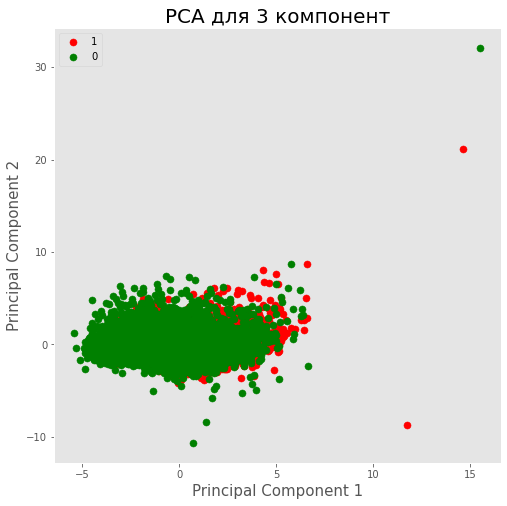

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA для 3 компонент', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['smoking'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Вокруг курящих виден красный "ободок" из курящих, проверим, что будет если обучить на этом дерево

In [13]:
X_tree = finalDf.drop(columns="smoking")           
y_tree = finalDf['smoking']   
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.1, random_state=42)
np.isfinite(finalDf)

,principal component 1,principal component 2,smoking
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
9995,True,True,True
9996,True,True,True
9997,True,True,True
9998,True,True,True


In [14]:
DTR = DecisionTreeClassifier()

DTR_parametrs = { 'max_depth': range (1, 10, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2)}
DTR_grid = GridSearchCV(DTR, DTR_parametrs, cv=5)
os.system('cls||clear')
DTR_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2)})

In [15]:
DTR_pred = DTR_grid.predict(X_test)
print("DTR ", DTR_grid.best_params_,":",accuracy_score(y_test,DTR_pred)*100)
print("Conf_matrix: \n\n", confusion_matrix(y_test,DTR_pred), "\n")
print("Class_report: \n\n", classification_report(y_test,DTR_pred))

DTR  {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 2} : 70.3
Conf_matrix: 

 [[489 184]
 [113 214]] 

Class_report: 

               precision    recall  f1-score   support

           0       0.81      0.73      0.77       673
           1       0.54      0.65      0.59       327

    accuracy                           0.70      1000
   macro avg       0.67      0.69      0.68      1000
weighted avg       0.72      0.70      0.71      1000



Вроде работает неплохо, продолжаем

In [16]:
finalDf = (finalDf-finalDf.mean ())/finalDf.std()

# K - means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(finalDf)
    inertia.append(np.sqrt(kmeans.inertia_))

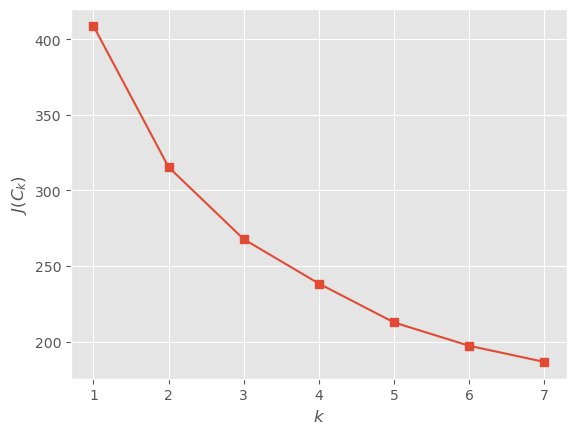

In [ ]:
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

Пусть будет 4 🤷

In [ ]:
clustering = KMeans(n_clusters=4, random_state=1)
label = clustering.fit_predict(finalDf)

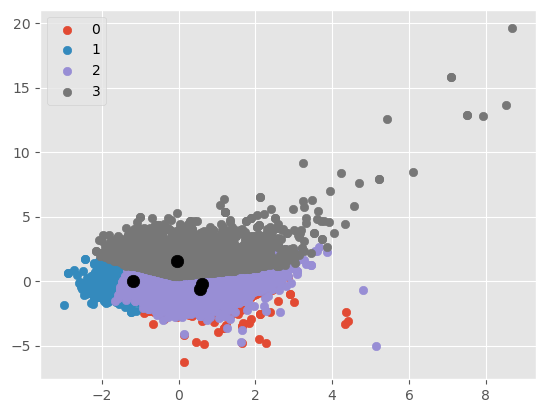

In [ ]:
centroids = clustering.cluster_centers_
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(finalDf.values[label == i , 0] , finalDf.values[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
for i in u_labels:
    time_df = finalDf[label == i]
    time_df['smoking'] = time_df['smoking'].apply(lambda x: 1 if x > 0 else 0)
    print("Процент курящих в классе {} равен {}%, количество людей в классе {}".format( \
                                i,len(time_df[time_df.smoking > 0])/len(time_df) * 100, len(time_df)))

Процент курящих в классе 0 равен 0.0%, количество людей в классе 12667
Процент курящих в классе 1 равен 0.8859859018301752%, количество людей в классе 15463
Процент курящих в классе 2 равен 100.0%, количество людей в классе 19724
Процент курящих в классе 3 равен 7.578463893850472%, количество людей в классе 7838


# Mean Shift

In [1]:
from sklearn.cluster import MeanShift

In [2]:
clustering = MeanShift(bandwidth=2)
label = clustering.fit_predict(finalDf)

NameError: ignored

In [ ]:
centroids = clustering.cluster_centers_
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(finalDf.values[label == i , 0] , finalDf.values[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
for i in u_labels:
    time_df = finalDf[label == i]
    time_df['smoking'] = time_df['smoking'].apply(lambda x: 1 if x > 0 else 0)
    print("Процент курящих в классе {} равен {}%, количество людей в классе {}".format( \
                                i,len(time_df[time_df.smoking > 0])/len(time_df) * 100, len(time_df)))

# DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

In [18]:
clustering = DBSCAN(eps=3, min_samples=2)
label = clustering.fit_predict(finalDf)

In [19]:
centroids = clustering.cluster_centers_
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(finalDf.values[label == i , 0] , finalDf.values[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

AttributeError: ignored

In [ ]:
for i in u_labels:
    time_df = finalDf[label == i]
    time_df['smoking'] = time_df['smoking'].apply(lambda x: 1 if x > 0 else 0)
    print("Процент курящих в классе {} равен {}%, количество людей в классе {}".format( \
                                i,len(time_df[time_df.smoking > 0])/len(time_df) * 100, len(time_df)))

# Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
clustering = AgglomerativeClustering(n_clusters=4)
label = clustering.fit_predict(finalDf)

In [ ]:
centroids = clustering.cluster_centers_
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(finalDf.values[label == i , 0] , finalDf.values[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [ ]:
for i in u_labels:
    time_df = finalDf[label == i]
    time_df['smoking'] = time_df['smoking'].apply(lambda x: 1 if x > 0 else 0)
    print("Процент курящих в классе {} равен {}%, количество людей в классе {}".format( \
                                i,len(time_df[time_df.smoking > 0])/len(time_df) * 100, len(time_df)))